<a href="https://colab.research.google.com/github/nkilaru213/cep/blob/master/Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Loading the data for analysis
patient_df=pd.read_csv('/content/drive/My Drive/Exercises/PATIENTS.csv')

In [13]:
def plot_gender_distribution(df):
    # Visualizing gender distribution
    gender_counts = df["gender"].value_counts()
    plt.figure(figsize=(6, 4))
    gender_counts.plot(kind="bar", color=["blue", "pink"])
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_age_distribution(df):
    # Checking the age spread of patients
    # Convert 'dob' column to datetime objects if it's not already
    df["dob"] = pd.to_datetime(df["dob"])
    df["age"] = 2025 - df["dob"].dt.year
    plt.figure(figsize=(8, 5))
    df["age"].plot(kind="hist", bins=10, color="lightgreen", edgecolor="black")
    plt.title("Age Distribution of Patients")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



In [ ]:
def plot_mortality_rate_by_gender(df):
    # Mortality analysis based on gender
    mortality_by_gender = df.groupby("gender")["expire_flag"].mean() * 100
    plt.figure(figsize=(6, 4))
    mortality_by_gender.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Mortality Rate by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Mortality Rate (%)")
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_hospital_vs_ssn_deaths(df):
    # Death record sources visualization
    dod_counts = {
        "Hospital Deaths": df["dod_hosp"].notna().sum(),
        "SSN Deaths": df["dod_ssn"].notna().sum(),
        # Ensure 'Other' is not negative using max(0, ...)
        "Other": max(0, df["expire_flag"].sum() - (df["dod_hosp"].notna().sum() + df["dod_ssn"].notna().sum()))
    }
    plt.figure(figsize=(6, 4))
    plt.pie(dod_counts.values(), labels=dod_counts.keys(), autopct="%1.1f%%", colors=["gold", "lightblue", "pink"])
    plt.title("Distribution of Death Records")
    plt.tight_layout()
    plt.show()

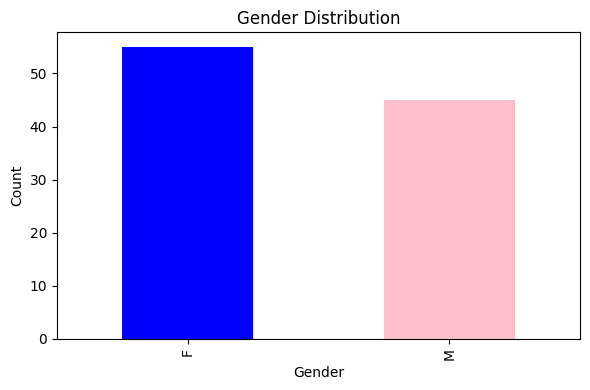

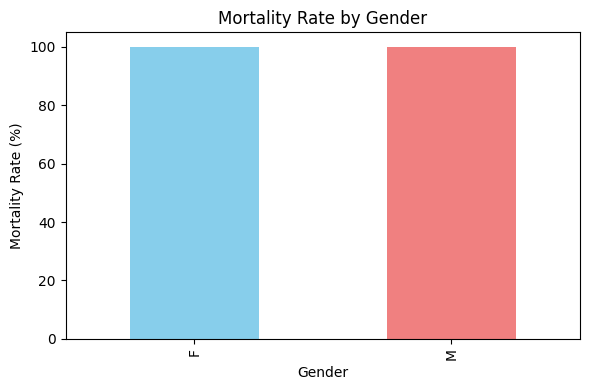

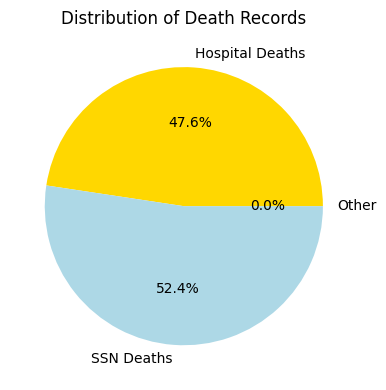

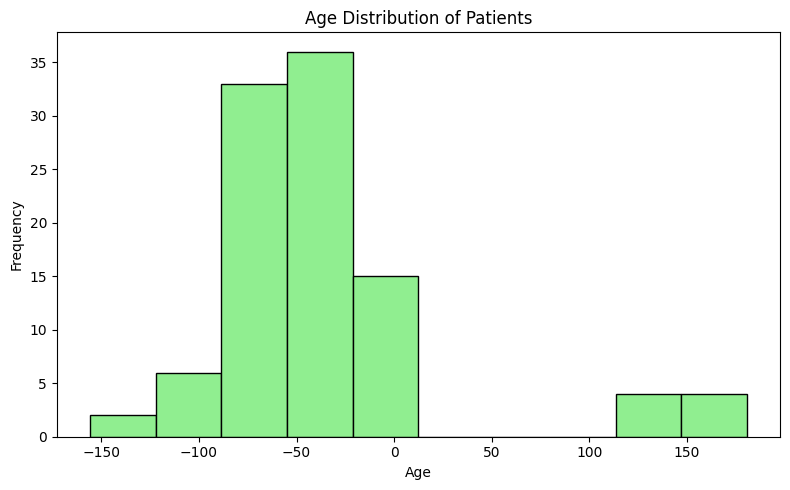

In [14]:
# Generating relevant visualizations
plot_gender_distribution(patient_df)
plot_mortality_rate_by_gender(patient_df)
plot_hospital_vs_ssn_deaths(patient_df)
plot_age_distribution(patient_df)

